In [1]:
## Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To view all columns
pd.set_option('display.max_columns', None)

In [2]:
## Reading the donar file
donor_df = pd.read_csv(r'..\Data\cleaned_data\donar_data_cleaned.csv')

### Summary Statistics

In [3]:
donor_df.describe()

,TARGET_B,TARGET_D6,TARGET_D12,TARGET_D18,TARGET_D24,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,NUMBER_OF_RESP,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000
mean,0.049610,14.444205,40.604697,65.837161,81.045842,96422.302589,81.778990,12.896255,59.367077,0.073184,27.870289,4.019904,0.498065,6.155014,1080.546268,342.150390,69.706760,0.505001,0.221563,0.230719,21.453104,70.854666,12.896255,18.200251,69.612616
std,0.217144,103.496562,266.433040,418.931235,521.768301,55787.027752,72.614414,4.624156,14.613941,0.260445,14.376935,1.745956,0.500009,2.805712,963.685123,164.573562,21.697514,0.499988,0.415309,0.186280,16.125616,1174.961438,4.624156,4.031021,37.636210
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-1300.000000,2.000000,4.000000,15.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,48215.000000,29.000000,11.000000,51.000000,0.000000,15.000000,2.000000,0.000000,4.000000,517.000000,232.000000,60.000000,0.000000,0.000000,0.100000,16.000000,0.000000,11.000000,16.000000,33.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,96760.000000,65.000000,12.000000,59.000000,0.000000,28.000000,4.000000,0.000000,7.000000,746.000000,311.000000,76.000000,1.000000,0.000000,0.200000,18.000000,0.000000,12.000000,18.000000,65.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,145319.000000,113.000000,13.000000,69.000000,0.000000,40.000000,5.000000,1.000000,9.000000,1227.000000,418.000000,85.000000,1.000000,0.000000,0.333000,21.000000,60.000000,13.000000,20.000000,105.000000
max,1.000000,4079.800000,9200.000000,11400.000000,15973.870000,191779.000000,1139.000000,64.000000,87.000000,1.000000,53.000000,7.000000,1.000000,9.000000,6000.000000,1500.000000,99.000000,1.000000,1.000000,1.000000,376.000000,159362.800000,64.000000,27.000000,260.000000


Observations: 

1. TARGET_D6, TARGET_D12, TARGET_D18, TARGET_D24 -> Has lower mean compared to std dev which implies they might have skewed distribution.
2. On avg, each person is contacted about 12 times in the past. (Investigate for correlation)
3. Avg DONOR_AGE is 59. (Investigate to see if it has some correlation to donations)
4. MONTHS_SINCE_LAST_PROM_RESP has negative value. Ideally shouldnt be possible. 
5. Negative value for gift amount? 
6. On avg Donors take 18 months to donate. 

### Correlation Matrix and Analysis

In [4]:
## Added a new column donated which indicates if a person has ever donated in any timeframe
donor_df['donated'] = donor_df.apply(lambda row: 1 if row[['TARGET_B','TARGET_D6','TARGET_D12','TARGET_D18','TARGET_D24']].max() > 0 else 0, axis = 1)

In [6]:
donor_df[donor_df['donated'] == 1].head()

,TARGET_B,TARGET_D6,TARGET_D12,TARGET_D18,TARGET_D24,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,NUMBER_OF_RESP,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENCY_FREQ_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,donated
9125,1,200.00,200.00,220.00,250.00,143253,53,12,76.0,0,U,15.0,H,F,5.0,1,6.0,2089,275,36,0,0,A3,0.200,24.0,0.0,12,17,52,1
9132,1,108.38,1050.56,1800.98,2287.68,149196,29,14,76.0,0,U,8.0,H,M,7.0,1,9.0,3273,609,90,1,0,A2,0.429,16.0,37.3,14,16,29,1
9133,1,90.96,454.80,818.64,939.92,149433,137,13,76.0,0,U,18.0,U,M,5.0,0,8.0,2159,557,84,1,0,A1,0.000,18.0,0.0,13,18,128,1
9137,1,100.00,225.00,350.00,525.00,151986,41,8,76.0,0,S,13.0,H,F,7.0,1,8.0,2598,518,86,0,0,E1,0.167,15.0,25.0,8,15,40,1
9138,1,100.00,550.00,1161.86,1615.89,152010,137,13,76.0,0,S,3.0,H,M,5.0,1,8.0,3540,277,83,1,0,A4,0.375,16.0,44.4,13,16,122,1


In [7]:
donor_df['donated'].value_counts()

0    18908
1      987
Name: donated, dtype: int64

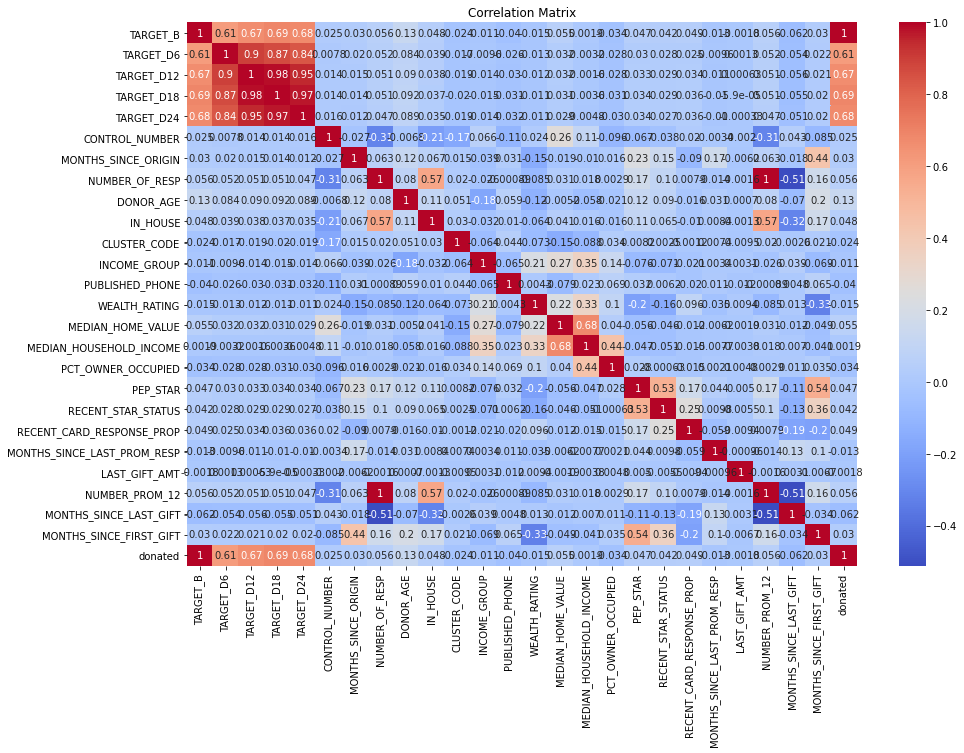

In [8]:
corr_matrix = donor_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observations: 

1. All donations are highly correlated, indicating that the person tend to donate more often after first donation. 
2. In House program has high correlation with months since last gift, number of promotions sent and number of responses which seems to suggest in house program draws more donors. 
3. DONOR AGE has positive correlation with donation indicating older ppl tend to donate more than young ppl

### Target Analysis
Analysing characteristics of donors vs non donors to identify the difference and find a strong predictor of donation

Below are the steps to performed Target Analysis: <br>
1. Descriptive Analysis: Calculating smmary statistics between donor vs non donor <br>
2. 

In [10]:
donors = donor_df[donor_df['donated'] == 1]
non_donors = donor_df[donor_df['donated'] == 0]


In [11]:
donors.describe()

,TARGET_B,TARGET_D6,TARGET_D12,TARGET_D18,TARGET_D24,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,NUMBER_OF_RESP,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,donated
count,987.0,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.00000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.00000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.0
mean,1.0,291.152442,818.470557,1327.082391,1633.644397,102548.576494,91.209726,14.027356,67.734043,0.12766,26.376292,3.934144,0.411348,5.973658,1312.903749,343.517730,66.45998,0.607903,0.297872,0.270511,20.506586,61.841398,14.027356,17.108409,74.592705,1.0
std,0.0,368.069357,891.600995,1365.856835,1718.697061,60902.009509,85.129883,6.499201,11.371468,0.33388,14.843819,1.718743,0.492327,2.854361,1153.506358,176.303924,23.24879,0.488466,0.457555,0.189507,14.260781,289.178868,6.499201,4.601944,38.724233,0.0
min,1.0,0.000000,0.000000,12.510000,25.000000,142.000000,1.000000,4.000000,7.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,15.000000,1.0
25%,1.0,75.000000,327.925000,619.465000,710.000000,27965.500000,41.000000,11.000000,58.500000,0.00000,13.000000,2.000000,0.000000,4.000000,550.500000,229.000000,54.00000,0.000000,0.000000,0.125000,16.000000,0.000000,11.000000,15.500000,40.000000,1.0
50%,1.0,180.000000,560.000000,900.000000,1100.000000,123972.000000,77.000000,13.000000,63.000000,0.00000,27.000000,5.000000,0.000000,7.000000,852.000000,306.000000,73.00000,1.000000,0.000000,0.250000,18.000000,0.000000,13.000000,17.000000,75.000000,1.0
75%,1.0,350.000000,1000.000000,1579.880000,1947.540000,152378.000000,125.000000,14.000000,77.000000,0.00000,39.600000,5.000000,1.000000,9.000000,1714.000000,418.500000,84.00000,1.000000,1.000000,0.400000,21.000000,59.120000,14.000000,19.000000,113.000000,1.0
max,1.0,4079.800000,9200.000000,11400.000000,15973.870000,190795.000000,928.000000,59.000000,87.000000,1.00000,53.000000,7.000000,1.000000,9.000000,5982.000000,1500.000000,99.00000,1.000000,1.000000,1.000000,161.000000,8000.000000,59.000000,27.000000,162.000000,1.0


In [12]:
non_donors.describe()

,TARGET_B,TARGET_D6,TARGET_D12,TARGET_D18,TARGET_D24,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,NUMBER_OF_RESP,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,donated
count,18908.0,18908.0,18908.0,18908.0,18908.0,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.000000,18908.00000,18908.000000,18908.000000,18908.000000,18908.0
mean,0.0,0.0,0.0,0.0,0.0,96102.510313,81.286704,12.837212,58.930320,0.070341,27.948276,4.024381,0.502591,6.164481,1068.417178,342.079014,69.876243,0.499630,0.217580,0.228641,21.502512,71.32516,12.837212,18.257246,69.352655,0.0
std,0.0,0.0,0.0,0.0,0.0,55490.262139,71.869952,4.497332,14.633088,0.255727,14.348280,1.747294,0.500007,2.802904,951.217181,163.942853,21.600738,0.500013,0.412611,0.185881,16.215891,1203.42710,4.497332,3.990924,37.561473,0.0
min,0.0,0.0,0.0,0.0,0.0,5.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-1300.00000,2.000000,4.000000,15.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,48648.000000,29.000000,11.000000,50.000000,0.000000,15.900000,2.000000,0.000000,4.000000,515.000000,232.000000,60.000000,0.000000,0.000000,0.100000,16.000000,0.00000,11.000000,16.000000,33.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,95345.500000,65.000000,12.000000,59.000000,0.000000,28.000000,4.000000,1.000000,7.000000,742.000000,311.000000,76.000000,0.000000,0.000000,0.200000,18.000000,1.07500,12.000000,18.000000,65.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,144507.000000,113.000000,13.000000,69.000000,0.000000,40.000000,5.000000,1.000000,9.000000,1209.000000,418.000000,85.000000,1.000000,0.000000,0.333000,21.000000,60.00000,13.000000,20.000000,104.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,191779.000000,1139.000000,64.000000,87.000000,1.000000,53.000000,7.000000,1.000000,9.000000,6000.000000,1500.000000,99.000000,1.000000,1.000000,1.000000,376.000000,159362.80000,64.000000,27.000000,260.000000,0.0


Observations:

For Donors, Number of Res, In house and Median Age is higher, Custer_code, Income group and wealth rating is slightly lower. Rest of the chareristics seems to be similar. 

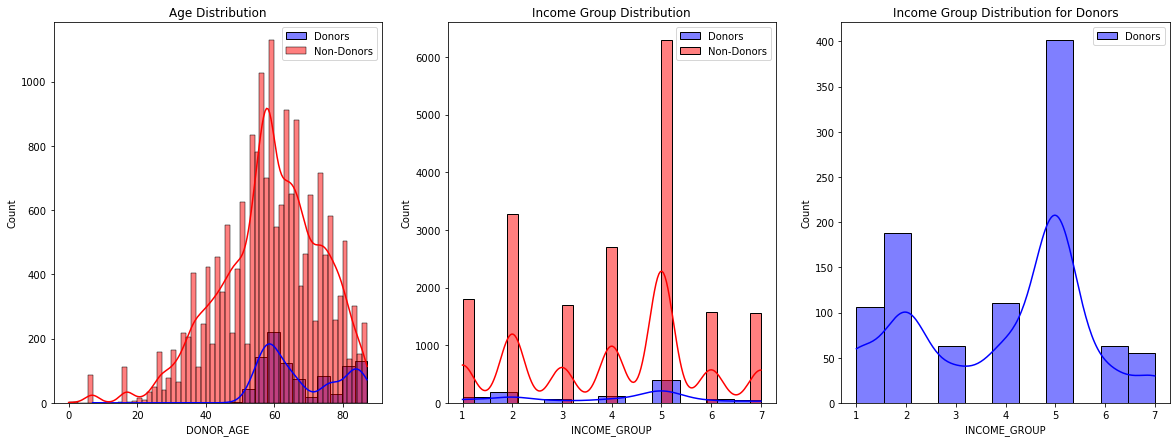

In [15]:
# Visualizations
plt.figure(figsize=(20, 7))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(donors['DONOR_AGE'], kde=True, color='blue', label='Donors')
sns.histplot(non_donors['DONOR_AGE'], kde=True, color='red', label='Non-Donors')
plt.title('Age Distribution')
plt.legend()

# Income group distribution
plt.subplot(1, 3, 2)
sns.histplot(donors['INCOME_GROUP'], kde=True, color='blue', label='Donors')
sns.histplot(non_donors['INCOME_GROUP'], kde=True, color='red', label='Non-Donors')
plt.title('Income Group Distribution')
plt.legend()

# Income group distribution just for Donors to understand better
plt.subplot(1, 3, 3)
sns.histplot(donors['INCOME_GROUP'], kde=True, color='blue', label='Donors')
plt.title('Income Group Distribution for Donors')
plt.legend()


plt.show()

Observations:

1. Age < 50 dont seem to Donate. 
2. Donors seems to falls highly in income group 2 and 5



In [17]:
## Saving the file for modeling
donor_df.to_csv(r'..\Data\cleaned_data\data_for_modeling.csv', index=False)

In [ ]:
S